In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score, matthews_corrcoef
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import pandas_profiling as pp
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Datasets\Train_test_linux\Train_Test_Linux_disk.csv")
# profile=pp.ProfileReport(df)
# profile.to_file("linux_disk.html")

In [3]:
df.drop(['ts','label'],axis=1,inplace=True)

label_encoder=preprocessing.LabelEncoder()
df['CMD']=label_encoder.fit_transform(df['CMD'])
df['type']=label_encoder.fit_transform(df['type'])

x=df.loc[:,['PID','RDDSK','WRDSK','WCANCL','DSK','CMD']] # input
y=df.loc[:,['type']] # target

# splitting thee dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

In [5]:
gnb=GaussianNB()
model=gnb.fit(x_train,y_train.values.ravel())
y_pred=model.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
#print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

Accuracy:  0.12949161010950577
Recall:  0.12949161010950577
F1score:  0.06737591727872946


In [4]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train.values.ravel())
y_pred=mnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred,average="weighted"))
print("F1 score: ",f1_score(y_test,y_pred,average="weighted"))

Accuracy:  0.38770454261564724
Recall:  0.38770454261564724
F1 score:  0.39979260870332034


In [4]:
y_true = df["type"].values
y_true=

In [5]:
rfc=RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rfc.fit(x_train,y_train.values.ravel())
y_pred=rfc.predict(x_test)
# y_pred_random=rfc.predict(x_test)
# y_score_random = rfc.predict_proba(x_test)[:, 1]
# print(y_test)
# print(y_pred)
# print("Accuracy: ",accuracy_score(y_test,y_pred))
# print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
# print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
# print("F1score: ",f1_score(y_test,y_pred,average='weighted'))
print(matthews_corrcoef(y_test, y_pred))

0.5609882924307029


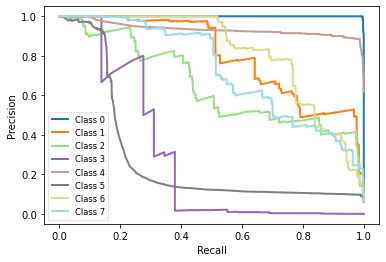

In [14]:
# Extract feature vectors and labels from DataFrame
# X = df_data.drop("label", axis=1).values  # assuming the label column is named "label"
y_true = df["type"].values  # assuming the label column is named "label"

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.30, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities for each class for each sample
y_score = clf.predict_proba(X_test)

# Compute precision-recall curve for each class
n_classes = len(np.unique(y_true))
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_score[:, i])

# Plot precision-recall curves for each class
plt.figure()
colors = plt.cm.get_cmap("tab20")(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label="Class {}".format(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left", fontsize="small", framealpha=0.5)
plt.show()


In [16]:
# Extract feature vectors and labels from DataFrame
# X = df_data.drop("label", axis=1).values  # assuming the label column is named "label"
y_true = df["type"].values  # assuming the label column is named "label"

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.3, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities for each class for each sample
y_score = clf.predict_proba(X_test)

# Compute precision-recall curve for all classes combined
precision, recall, _ = precision_recall_curve(y_test, y_score[:, 1])  # use probabilities for class 1

# Plot precision-recall curve
plt.plot(recall, precision, lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


ValueError: multiclass format is not supported

In [9]:
y_score = rfc.predict_proba(x_test)

In [11]:
n_classes = len(np.unique(y_true))

# Compute precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_true[:, i], y_score[:, i])

# Compute micro-average precision-recall curve and average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_true, y_score, average="micro")

# Plot precision-recall curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label="Class {0} (AP = {1:0.2f})".format(i, average_precision[i]))
plt.plot(recall["micro"], precision["micro"], label="Micro-average (AP = {0:0.2f})".format(average_precision["micro"]))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall curve for multi-class classification")
plt.legend(loc="best")
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [8]:
xgb_classifier=xgb.XGBClassifier(n_estimators=100, random_state=42, max_depth=10)
xgb_classifier.fit(x_train,y_train.values.ravel())
y_pred_xg=xgb_classifier.predict(x_test)
y_score_xgb = xgb_classifier.predict_proba(x_test)[:, 1]
# print("Accuracy: ",accuracy_score(y_test,y_pred))
# #print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
# print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
# print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

In [9]:
model = MLPClassifier(max_iter=500, random_state=42)
model.fit(x_train, y_train.values.ravel())
y_pred=model.predict(x_test)
y_score_mlp = model.predict_proba(x_test)[:, 1]
# print("Accuracy: ",accuracy_score(y_test,y_pred))
# #print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
# print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
# print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

In [10]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
# Train Adaboost Classifer
model1 = abc.fit(x_train, y_train.values.ravel())
#Predict the response for test dataset
y_pred = model1.predict(x_test)
y_score_abc = model1.predict_proba(x_test)[:, 1]
# print("Accuracy: ",accuracy_score(y_test,y_pred))
# #print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
# print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
# print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

In [6]:
clf=DecisionTreeClassifier()
#Training a Decision Tree Classifer
clf.fit(x_train,y_train.values.ravel())
#Predicting the response for test dataset
y_pred=clf.predict(x_test)
# splitting thee dataset into training and testing sets
# dprecision, drecall, thresholds = precision_recall_curve(y_test, y_pred)
# y_score_decision = clf.predict_proba(x_test)[:, 1]
print(matthews_corrcoef(y_test, y_pred))

0.9026215538282495


In [13]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train,y_train.values.ravel())
y_pred=classifier.predict(x_test)
# kprecision, krecall, thresholds = precision_recall_curve(y_test, y_pred)
y_score_knn = classifier.predict_proba(x_test)[:, 1]

In [16]:
precision1, recall1, _ = precision_recall_curve(y_test, y_score_random)
precision2, recall2, _ = precision_recall_curve(y_test, y_score_xgb)
precision3, recall3, _ = precision_recall_curve(y_test, y_score_mlp)
precision4, recall4, _ = precision_recall_curve(y_test, y_score_decision)
precision5, recall5, _ = precision_recall_curve(y_test, y_score_knn)
precision6, recall6, _ = precision_recall_curve(y_test, y_score_abc)

ValueError: multiclass format is not supported